<a href="https://colab.research.google.com/github/KarenP17/Example/blob/main/ArbolesDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Contiene funciones que nos ayudan en el análisis de datos

Importando los datos

In [54]:
#Obtenemos los datos contenidos en nuestro archivo csv
madres = pd.read_csv('/content/Maternal Health Risk Data Set.csv', engine='python', index_col=0)


In [ ]:
madres.head()

,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk,pred
Age,,,,,,,,,
25,130,80,15,98,86,1,0,0,140
35,140,90,13,98,70,1,0,0,140
29,90,70,8,100,80,1,0,0,90
30,140,85,7,98,70,1,0,0,140
35,120,60,6,98,76,0,1,0,90


Mostramos las cinco primeras filas

In [ ]:
madres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 25 to 32
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SystolicBP   1014 non-null   int64  
 1   DiastolicBP  1014 non-null   int64  
 2   BS           1014 non-null   float64
 3   BodyTemp     1014 non-null   float64
 4   HeartRate    1014 non-null   int64  
 5   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 55.5+ KB


Se cargaron correctamente las variables

In [ ]:
#Convertimos los valores float de la columna Dtype a enteros
madres.dtypes

SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
madres.BS = madres.BS.astype(int)
madres.BodyTemp = madres.BodyTemp.astype(int)

In [ ]:
nivelRiesgo_dummy = pd.get_dummies(madres["RiskLevel"], prefix="RiskLevel")
madres = pd.concat([madres, nivelRiesgo_dummy], axis = 1)
del madres['RiskLevel']

In [ ]:
madres.dtypes

SystolicBP             int64
DiastolicBP            int64
BS                     int64
BodyTemp               int64
HeartRate              int64
RiskLevel_high risk    uint8
RiskLevel_low risk     uint8
RiskLevel_mid risk     uint8
dtype: object

In [ ]:
#Variables explicativas, todas menos la columna systolicBP
X = madres.drop(columns= 'SystolicBP')
#Objetivo
Y = madres.SystolicBP

Creamos el modelo del arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Llamamos al constructor del arbol de decisión
arbol = DecisionTreeClassifier(max_depth=2)

#Entrenamos el modelo
arbol_prec = arbol.fit(X,Y)

Graficamos el arbol de decisión

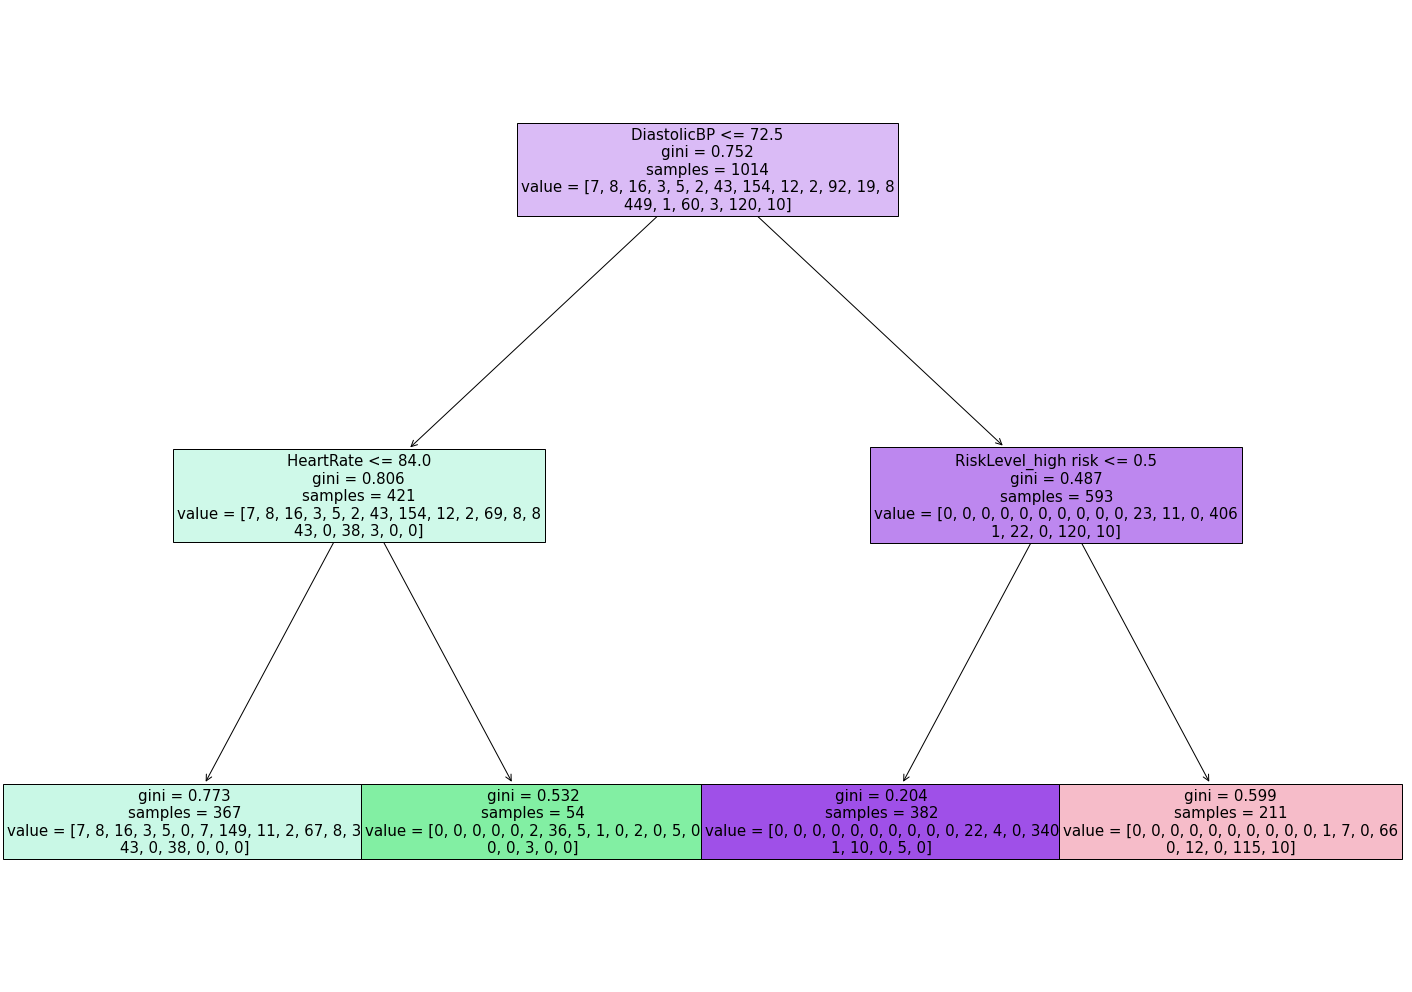

In [ ]:
from matplotlib import pyplot as plt  
from sklearn.tree import plot_tree

plt.figure(figsize=(25,18))

plot_tree(decision_tree=arbol_prec, feature_names=X.columns, filled=True, fontsize=15);


Hacemos una prueba con un dato para calcular la predicción

In [ ]:
a = X.sample
a

<bound method NDFrame.sample of      DiastolicBP  BS  BodyTemp  HeartRate  RiskLevel_high risk  \
Age                                                              
25            80  15        98         86                    1   
35            90  13        98         70                    1   
29            70   8       100         80                    1   
30            85   7        98         70                    1   
35            60   6        98         76                    0   
..           ...  ..       ...        ...                  ...   
22            60  15        98         80                    1   
55            90  18        98         60                    1   
35            60  19        98         86                    1   
43            90  18        98         70                    1   
32            65   6       101         76                    0   

     RiskLevel_low risk  RiskLevel_mid risk  
Age                                          
25               

In [ ]:
#Tabla original 
madres

,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
Age,,,,,,,,
25,130,80,15,98,86,1,0,0
35,140,90,13,98,70,1,0,0
29,90,70,8,100,80,1,0,0
30,140,85,7,98,70,1,0,0
35,120,60,6,98,76,0,1,0
...,...,...,...,...,...,...,...,...
22,120,60,15,98,80,1,0,0
55,120,90,18,98,60,1,0,0
35,85,60,19,98,86,1,0,0


Para la madre de 25 años que aparece en el primer lugar de la tabla en la prueba de predicción, se concluyó que hace parte junto con 382 personas que sufren de un nivel de riesgo alto

Se concluyó que son en total 1014 madres gestantes con tendencia de Presión arterial elevada

In [57]:
y_pred= arbol_prec.predict(X)

En los resultados, algunas madres de 22 y 55 años tienen presión arterial alta, pero según la predicción dice que está baja

In [59]:
madres['pred'] = y_pred
madres.sample(5)[['SystolicBP', 'pred']]

,SystolicBP,pred
Age,,
55,110,120
19,120,120
22,100,90
60,120,120
35,120,120


Realizamos la comparación de los aciertos según la edad en TRUE o FALSE

In [ ]:
madres['SystolicBP'] == madres['pred']

Age
25    False
35     True
29     True
30     True
35    False
      ...  
22    False
55    False
35     True
43    False
32    False
Length: 1014, dtype: bool

Nos muestra el número de aciertos con el modelo

In [ ]:
(madres['SystolicBP'] == madres['pred']).sum()

640

Calcular la media

In [ ]:
(madres['SystolicBP'] == madres['pred']).mean()

0.631163708086785

Calcular el porcentaje de aciertos, en conclusión el modelo es bueno en 63%

In [ ]:
(madres['SystolicBP'] == madres['pred']).sum()/1014

0.631163708086785

Creamos el histograma del nivel de mujeres gestantes con presion arterial elevada

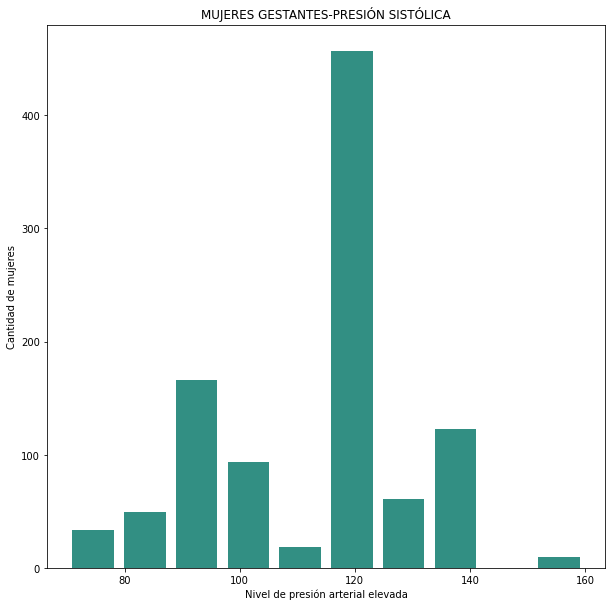

In [ ]:
import matplotlib.pyplot as plot_tree

plot_tree.hist(madres.SystolicBP, color='#328F83', rwidth=0.80)
plot_tree.title('MUJERES GESTANTES-PRESIÓN SISTÓLICA')
plot_tree.ylabel('Cantidad de mujeres')
plot_tree.xlabel('Nivel de presión arterial elevada')
plot_tree.show()